<a href="https://colab.research.google.com/github/diegosfc91/Advanced-Machine-Learning/blob/main/Algoritmo_K_means_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Módulo de Carga y Exploración de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Cargar el dataset
file_path = '/content/Mall_Customers.csv'  # Asegúrate de usar la ruta correcta

data = pd.read_csv(file_path)

# Seleccionar las variables para el análisis
selected_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Lista para almacenar las inercia (distorsión) para cada valor de K
inertia = []


# 2. Implementacion de K-MEANS

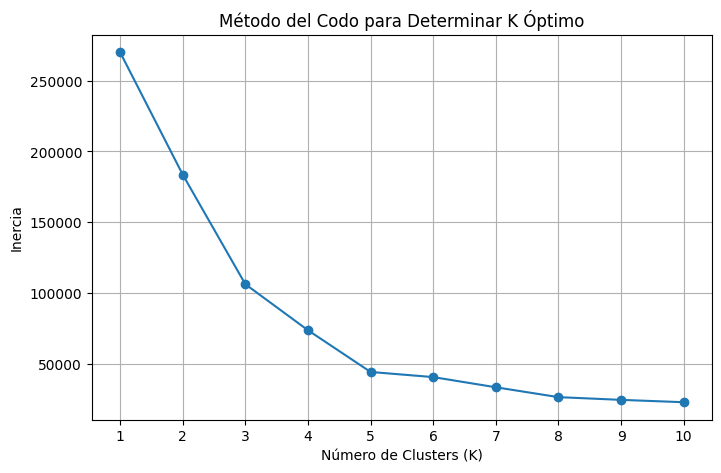

In [2]:
# Probar K en un rango (por ejemplo, de 1 a 10)
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_data)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Determinar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 11, 1))
plt.grid()
plt.show()

# 3. Módulo de Creación de Nuevas Características



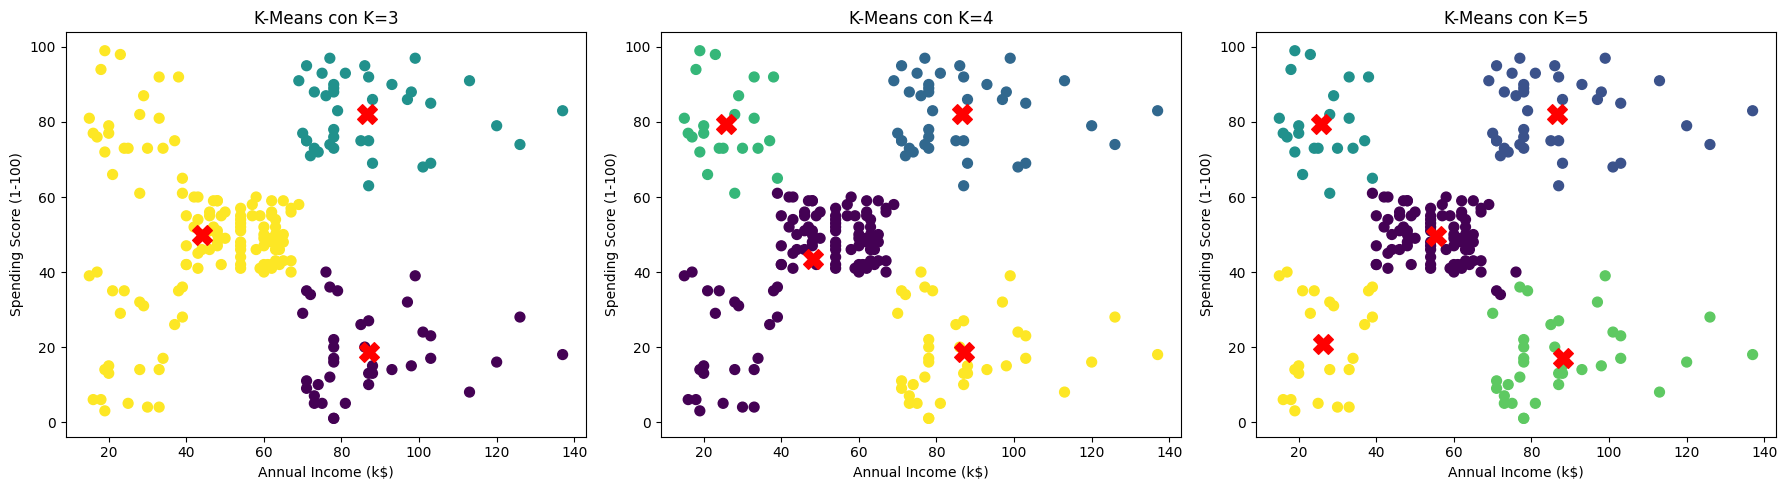

In [3]:
# Implementación de K-means y visualización para K = 3, 4, 5
k_values = [3, 4, 5]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_data)
    labels = kmeans.predict(selected_data)
    centroids = kmeans.cluster_centers_

    # Gráfico de dispersión de clusters
    axes[i].scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Centroides
    axes[i].set_title(f'K-Means con K={k}')
    axes[i].set_xlabel('Annual Income (k$)')
    axes[i].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# 4. Analisis de los datos



In [4]:
plt.tight_layout()
plt.show()

# Interpretación de Clusters con K = 5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(selected_data)
labels = kmeans.predict(selected_data)
centroids = kmeans.cluster_centers_

# Crear un DataFrame con los clusters asignados y los centroides
clustered_data = selected_data.copy()
clustered_data['Cluster'] = labels

# Resumen por cluster
cluster_summary = clustered_data.groupby('Cluster').mean()
print("\nResumen de los Clusters:")
print(cluster_summary)

# Interpretación textual
for cluster_id, centroid in enumerate(centroids):
    print(f"\nCluster {cluster_id}:")
    print(f"  - Ingreso Anual Promedio: {centroid[0]:.2f}k$")
    print(f"  - Puntaje de Gasto Promedio: {centroid[1]:.2f}")



<Figure size 640x480 with 0 Axes>


Resumen de los Clusters:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

Cluster 0:
  - Ingreso Anual Promedio: 55.30k$
  - Puntaje de Gasto Promedio: 49.52

Cluster 1:
  - Ingreso Anual Promedio: 86.54k$
  - Puntaje de Gasto Promedio: 82.13

Cluster 2:
  - Ingreso Anual Promedio: 25.73k$
  - Puntaje de Gasto Promedio: 79.36

Cluster 3:
  - Ingreso Anual Promedio: 88.20k$
  - Puntaje de Gasto Promedio: 17.11

Cluster 4:
  - Ingreso Anual Promedio: 26.30k$
  - Puntaje de Gasto Promedio: 20.91


# Analisis de Resultados


#### **Cluster 0**:
- **Ingreso Anual Promedio Bajo/Moderado** con un **Puntaje de Gasto Bajo**.
- Clientes ocasionales o poco comprometidos.
- **Estrategia**: Incentivar compras mediante descuentos o promociones personalizadas.

#### **Cluster 1**:
- **Ingreso Anual Promedio Alto** con un **Puntaje de Gasto Alto**.
- Clientes leales o de lujo con alto potencial de ingresos.
- **Estrategia**: Diseñar programas exclusivos, como beneficios VIP o acceso a productos premium.

#### **Cluster 2**:
- **Ingreso Anual Promedio Bajo** con un **Puntaje de Gasto Alto**.
- Clientes que invierten significativamente pese a ingresos limitados.
- **Estrategia**: Ofrecer financiamiento o programas de fidelización.

#### **Cluster 3**:
- **Ingreso Anual Promedio Alto** con un **Puntaje de Gasto Bajo**.
- Clientes conservadores, selectivos o enfocados en calidad/costo.
- **Estrategia**: Destacar la relación calidad-precio o productos de alta calidad.

#### **Cluster 4**:
- **Ingreso Anual Promedio Moderado** con un **Puntaje de Gasto Moderado**.
- Clientes promedio en términos de ingresos y comportamiento de gasto.
- **Estrategia**: Ofrecer promociones generales y mantener el engagement.

